In [32]:
#Importing all the useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [33]:
#Importing the Dataset
df1= pd.read_csv('Total Net Revenue.csv')

In [34]:
#Making a copy of the Dataset
df=df1

In [35]:
#Printing top 5 observations from the Dataset
df1.head()

,Year,TotalNetRevenue,InvestmentBanking Fees,PrincipalTransactions,LendingsandDeposits,AssetManagement,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
0,2008,67252,5526,10699,5088,13943,3467,7419,2169,43500
1,2009,100434,7087,9796,7045,12540,3678,7110,916,52352
2,2010,102694,6190,10894,6340,13499,3870,5891,2044,61196
3,2011,97234,5911,10005,6458,14094,2721,6158,2605,47689
4,2012,97031,5808,5536,6196,13668,8687,5658,4258,44910


In [36]:
df = df.drop('Year', axis=1)
df1=df

In [37]:
df1.head()

,TotalNetRevenue,InvestmentBanking Fees,PrincipalTransactions,LendingsandDeposits,AssetManagement,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
0,67252,5526,10699,5088,13943,3467,7419,2169,43500
1,100434,7087,9796,7045,12540,3678,7110,916,52352
2,102694,6190,10894,6340,13499,3870,5891,2044,61196
3,97234,5911,10005,6458,14094,2721,6158,2605,47689
4,97031,5808,5536,6196,13668,8687,5658,4258,44910


#### Our target variable, aka Dependent Variable, is Total Net Revenue.

In [38]:
# Select the feature for which you want to create scatter plots
selected_feature = 'TotalNetRevenue'

## Assumptions:
### Scatter Plot for each independent variable with Dependent Variable
#### Linearity: The relationship between the dependent variable and each independent variable is assumed to be linear. This means that changes in the independent variables are associated with constant and additive changes in the dependent variable. You can check for linearity by examining scatterplots of the variables.

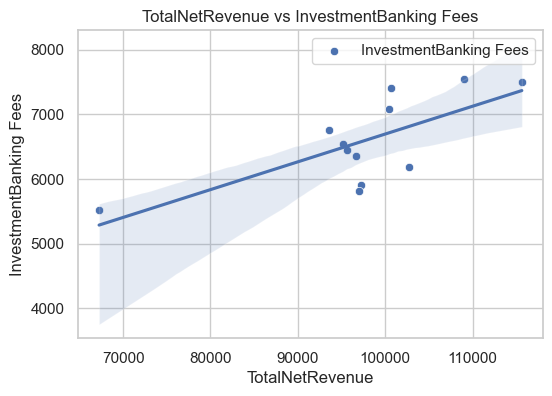

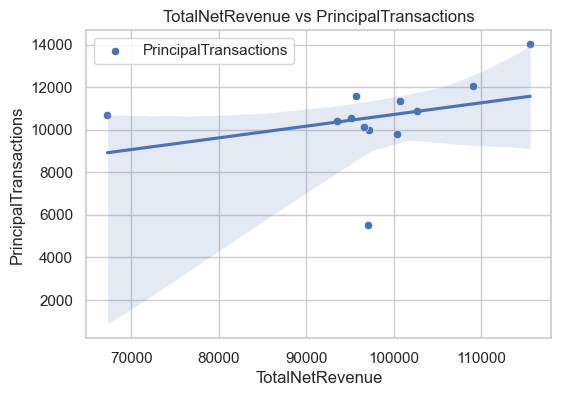

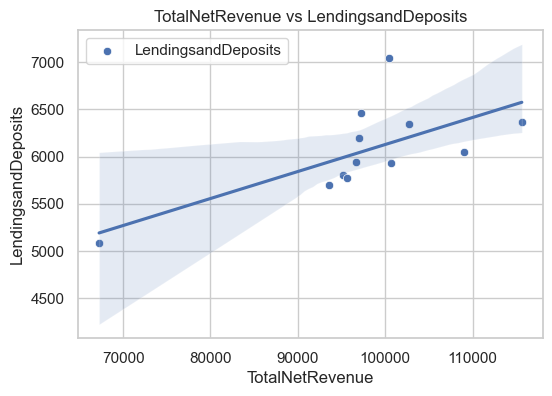

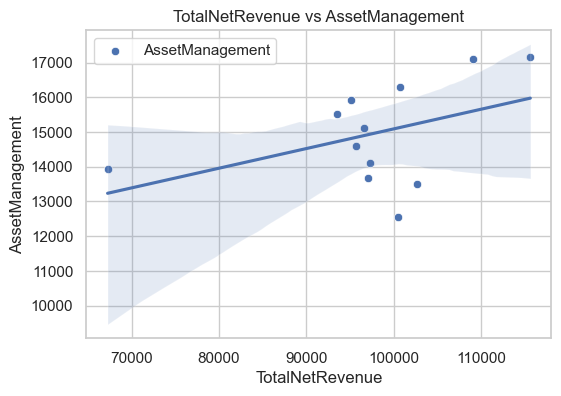

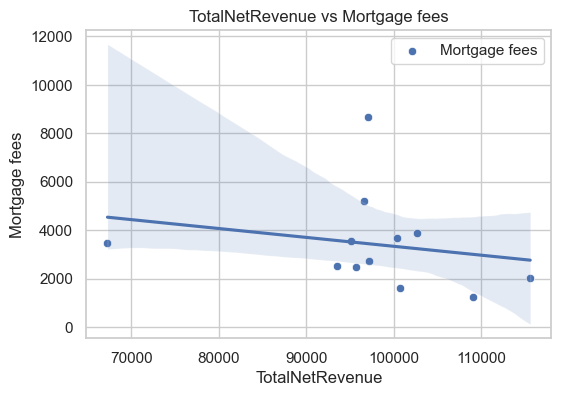

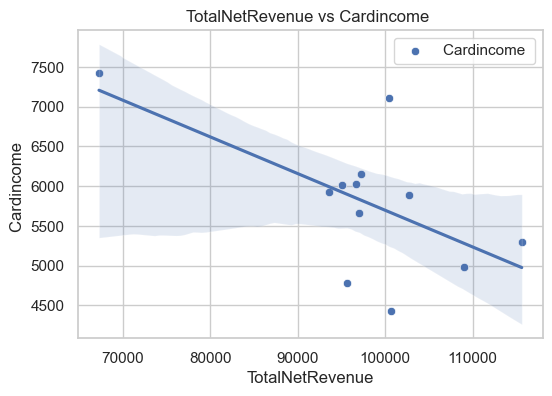

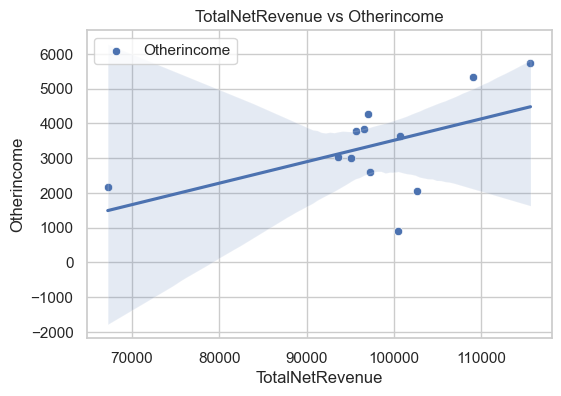

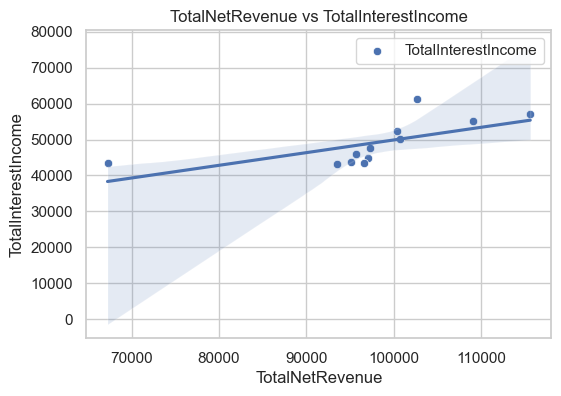

In [39]:
# Loop through all other columns and create scatter plots
for column in df.columns:
    if column != selected_feature:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        
        # Create a scatter plot
        sns.scatterplot(data=df, x=selected_feature, y=column, label=column)
        
        # Add a trendline
        sns.regplot(data=df, x=selected_feature, y=column, scatter=False)
        
        plt.xlabel(selected_feature)
        plt.ylabel(column)
        plt.title(f"{selected_feature} vs {column}")
        plt.grid(True)
        plt.legend()
        plt.show()

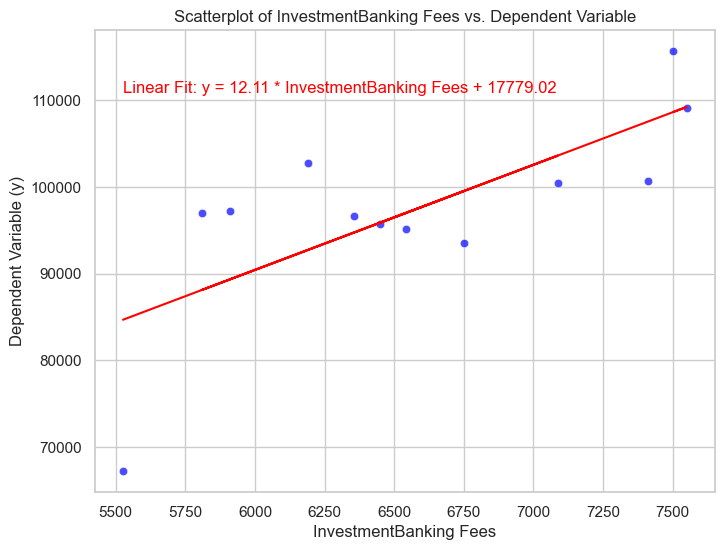

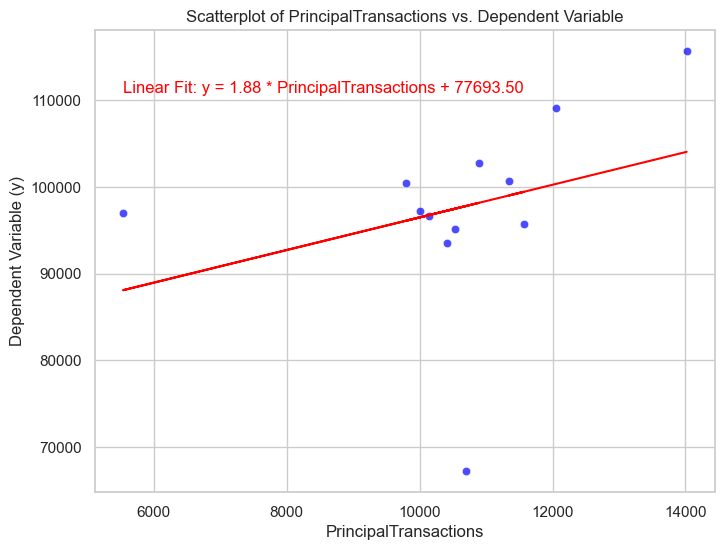

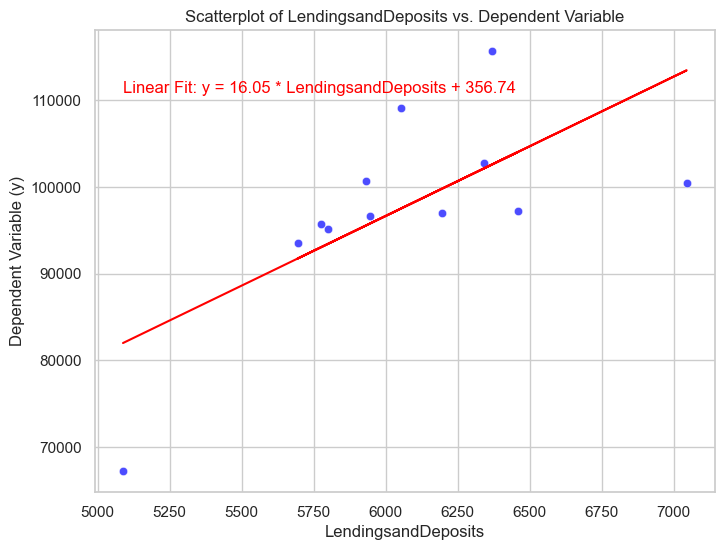

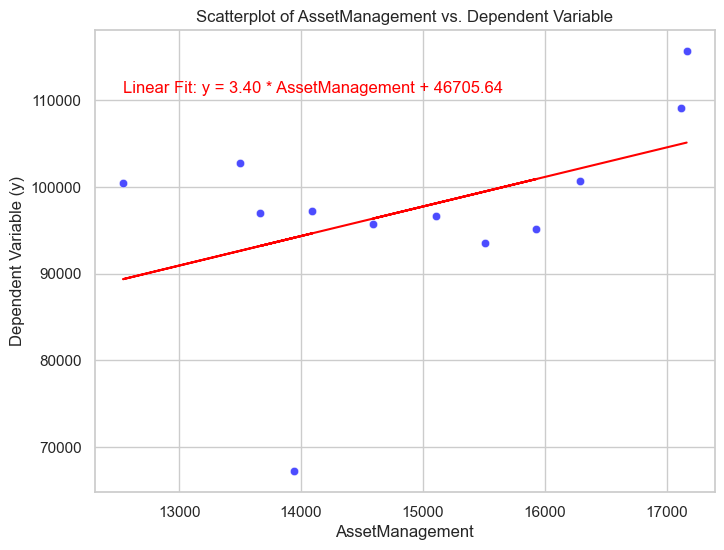

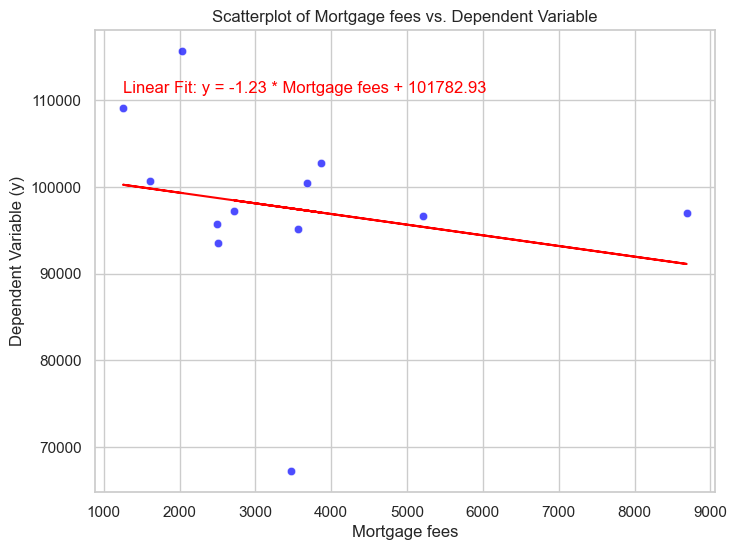

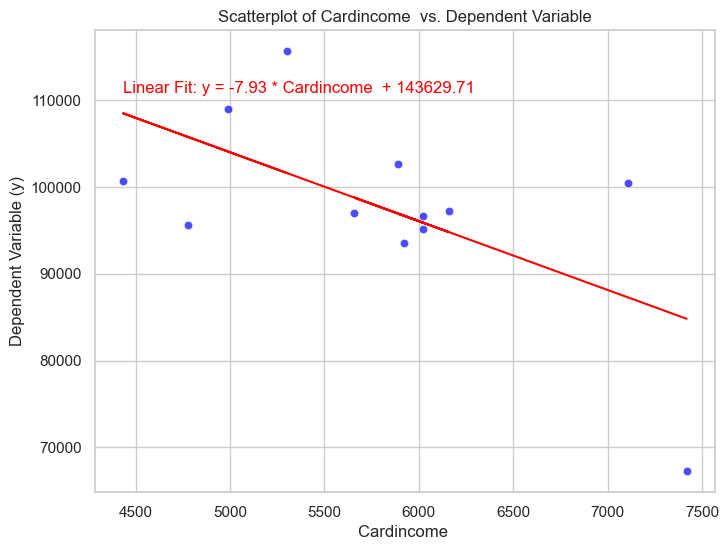

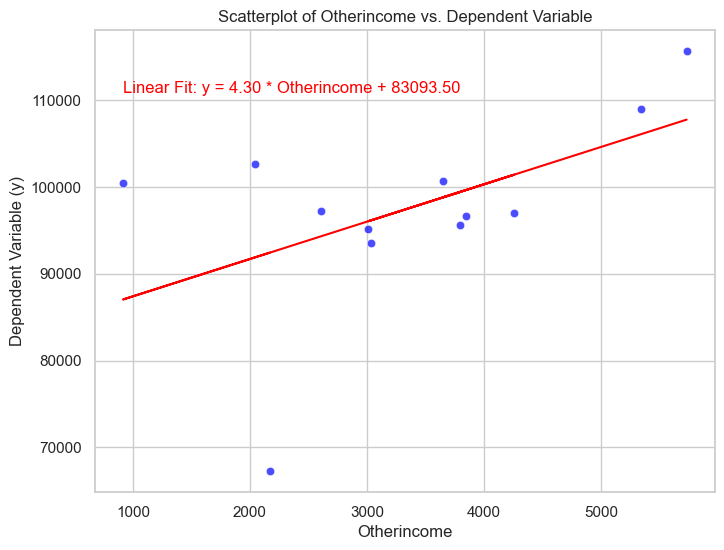

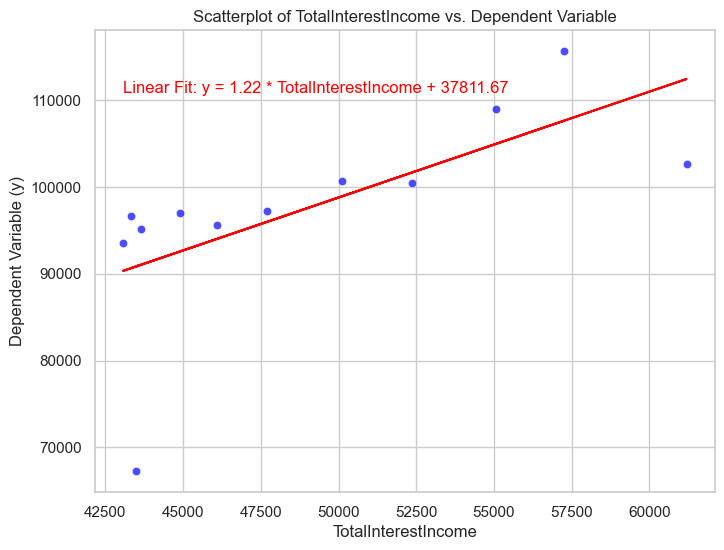

In [40]:
# Set the style for Seaborn (optional)
sns.set(style="whitegrid")

X = df.drop('TotalNetRevenue', axis=1)
y = df['TotalNetRevenue']

# Create scatterplots for each independent variable with interpretation
for var in X:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=X, x=var, y=y, color='blue', alpha=0.7)
    plt.title(f'Scatterplot of {var} vs. Dependent Variable')
    plt.xlabel(var)
    plt.ylabel('Dependent Variable (y)')
    plt.grid(True)
    
    # Fit a linear regression line
    coef = np.polyfit(X[var], y, 1)
    poly1d_fn = np.poly1d(coef)
    
    # Plot the regression line
    plt.plot(X[var], poly1d_fn(X[var]), color='red')
    
    # Provide interpretation
    plt.text(
        X[var].min(),
        y.min() + (y.max() - y.min()) * 0.9,
        f'Linear Fit: y = {coef[0]:.2f} * {var} + {coef[1]:.2f}',
        color='red'
    )
    
    plt.show()

In our multiple linear regression (MLR) analysis, we assume that the relationship between the dependent variable and each of the independent variables follows a linear pattern. This assumption of linearity implies that changes in the independent variables are associated with constant and additive changes in the dependent variable. We have visually assessed the linearity assumption by examining scatterplots of the variables, and our analysis is conducted under the premise that this linearity assumption holds for the relationships between the predictors and the target variable.

__No Perfect Linear Relationships:__
There should be no perfect linear relationships among the independent variables. Perfect multicollinearity occurs when one independent variable can be perfectly predicted from a linear combination of other variables. This makes it impossible to estimate unique coefficients for all variables involved. 
Perfect linear relationships, where one independent variable can be expressed as an exact linear combination of others, are not assumed or encountered here. 

In our multiple linear regression (MLR) analysis, we have undertaken a feature selection process to enhance the model's predictive performance and interpretability. As part of this process, we have identified and removed features that do not exhibit a strong correlation with the dependent variable. This decision is based on our objective of building a more focused and effective predictive model that prioritizes the inclusion of features with a higher degree of influence on the dependent variable. By eliminating less correlated features, we aim to simplify the model while improving its ability to capture meaningful relationships and enhance its overall predictive accuracy

In [41]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Check the correlation of the selected feature with all other features
correlations_with_selected_feature = correlation_matrix[selected_feature]

# Display the correlations
print("Correlations with", selected_feature)
print(correlations_with_selected_feature)

Correlations with TotalNetRevenue
TotalNetRevenue           1.000000
InvestmentBanking Fees    0.721652
PrincipalTransactions     0.321093
LendingsandDeposits       0.677155
AssetManagement           0.439103
Mortgage fees            -0.212189
Cardincome               -0.604559
Otherincome               0.515517
TotalInterestIncome       0.656201
Name: TotalNetRevenue, dtype: float64


We have decided to drop features with low correlations with the dependent variable, focusing our attention on retaining those features that exhibit high and moderate correlations. This strategic choice is grounded in our objective to build a streamlined and effective predictive model that emphasizes the inclusion of variables with substantial influence on the dependent variable. By excluding less correlated features, we aim to simplify the model while preserving its capacity to capture meaningful relationships, ultimately enhancing its predictive performance

In [42]:
# Specify the dependent feature and calculate correlations
dependent_feature = 'TotalNetRevenue'

for column in df.columns:
    if column != dependent_feature:
        correlation = df[dependent_feature].corr(df[column])
        
        if correlation > 0.7:
            interpretation = "strong positive correlation"
        elif correlation < -0.7:
            interpretation = "strong negative correlation"
        elif correlation > 0.3:
            interpretation = "moderate positive correlation"
        elif correlation < -0.3:
            interpretation = "moderate negative correlation"
        else:
            interpretation = "weak or no correlation"
        
        print(f"Correlation between {dependent_feature} and {column}: {correlation:.2f} ({interpretation})")

Correlation between TotalNetRevenue and InvestmentBanking Fees: 0.72 (strong positive correlation)
Correlation between TotalNetRevenue and PrincipalTransactions: 0.32 (moderate positive correlation)
Correlation between TotalNetRevenue and LendingsandDeposits: 0.68 (moderate positive correlation)
Correlation between TotalNetRevenue and AssetManagement: 0.44 (moderate positive correlation)
Correlation between TotalNetRevenue and Mortgage fees: -0.21 (weak or no correlation)
Correlation between TotalNetRevenue and Cardincome : -0.60 (moderate negative correlation)
Correlation between TotalNetRevenue and Otherincome: 0.52 (moderate positive correlation)
Correlation between TotalNetRevenue and TotalInterestIncome: 0.66 (moderate positive correlation)


We are dropping independent variables with low correlations to the dependent variable in our multiple linear regression model, focusing on keeping those with moderate and high correlations to improve the model's predictive power. 
Hence, __Mortage fees__ with __-0.21__ correlation is dropped from our dataframe

In [43]:
df1= df1.drop('Mortgage fees', axis=1)
df=df1

In [44]:
X = df.drop('TotalNetRevenue', axis=1)
y = df['TotalNetRevenue']

#### Assumption : No or Little Multicollinearity: 

Multicollinearity occurs when two or more independent variables in the model are highly correlated with each other. This can make it difficult to isolate the individual effect of each variable and can lead to unstable coefficient estimates. It's essential to assess multicollinearity using correlation matrices or variance inflation factor (VIF) values.

__VIF__, or Variance Inflation Factor, is used in multiple linear regression (MLR) primarily to detect and quantify multicollinearity among independent variables (features).

__VIF = 1__: No multicollinearity. The variable is not correlated with any other variables in the model.

__VIF < 5__: Moderate multicollinearity. The variable is moderately correlated with other variables in the model but may not cause significant issues.

__VIF >= 5__: High multicollinearity. The variable is highly correlated with one or more other variables in the model, which can lead to instability and reduced interpretability of coefficient estimates.

In [45]:
# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Fit your multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values and their interpretation
print(vif)

# Interpretation of VIF values
# Typically, a VIF value greater than 10 indicates high multicollinearity.
# A VIF value between 5 and 10 suggests moderate multicollinearity.
# VIF values less than 5 are generally considered acceptable.

high_vif_vars = vif[vif["VIF"] > 10]
moderate_vif_vars = vif[(vif["VIF"] >= 5) & (vif["VIF"] <= 10)]

if not high_vif_vars.empty:
    print("Variables with HIGH multicollinearity:")
    print(high_vif_vars)

if not moderate_vif_vars.empty:
    print("Variables with MODERATE multicollinearity:")
    print(moderate_vif_vars)


                 Variable          VIF
0                   const  1105.555386
1  InvestmentBanking Fees     4.923980
2   PrincipalTransactions     3.233811
3     LendingsandDeposits     3.346283
4         AssetManagement     9.744811
5             Cardincome      2.364993
6             Otherincome     4.668294
7     TotalInterestIncome     2.637388
Variables with HIGH multicollinearity:
  Variable          VIF
0    const  1105.555386
Variables with MODERATE multicollinearity:
          Variable       VIF
4  AssetManagement  9.744811


Here, the VIF (Variance Inflation Factor) for the __constant term (intercept) is high__ because the constant term is artificially introduced by adding a column of 1s to the design matrix of your independent variables. This constant term represents the intercept of the linear regression model and is used to account for cases when all independent variables are zero.

We are removing feature __AssetManagement__ with VIF (~9.74)__ in our multiple linear regression analysis to address multicollinearity and improve the model's stability and interpretability.

In [46]:
df1= df1.drop('AssetManagement', axis=1)
df=df1

We are assessing and addressing moderate multicollinearity among features with VIF values between 5 and 10 by examining their correlation matrix to inform potential adjustments in our multiple linear regression model.

In [47]:
X = df.drop('TotalNetRevenue', axis=1)
y = df['TotalNetRevenue']

In [48]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Set a threshold for identifying highly correlated features (adjust as needed)
threshold = 0.7

# Initialize lists to store highly correlated feature pairs
highly_correlated_features = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= threshold) and (i != j):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            highly_correlated_features.append((feature1, feature2, corr_matrix.iloc[i, j]))

# Interpret multicollinearity and print correlated feature pairs
if not highly_correlated_features:
    print("No features exhibit multicollinearity above the threshold.")
else:
    print("Highly Correlated Features:")
    for feature1, feature2, correlation in highly_correlated_features:
        print(f"{feature1} and {feature2} are highly correlated (Correlation = {correlation:.2f})")

Highly Correlated Features:
Otherincome and Cardincome  are highly correlated (Correlation = 0.70)


__"Card income"__ typically refers to the revenue generated by a financial institution or a company from credit card-related activities. In the context of calculating "total net revenue," card income would represent the portion of the company's revenue that comes from credit card operations

__"Other income"__ in the context of calculating "total net revenue" typically refers to revenue sources that are not part of a company's core operating activities. These sources of income may come from various non-operational or incidental activities. The specific components of "other income" can vary from one company to another

__Usually__ some companies choose to categorize certain types of income, including card income, separately under "other income" or "non-operating income" in their financial statements. This categorization is a matter of accounting and financial reporting practices and may vary from one company to another.

Given the substantial correlation between 'card income' and 'other income' __(~0.70)__ retaining both variables in our model could lead to multicollinearity issues. To address this concern and maintain model interpretability, we have made the deliberate decision to remove the 'card income' feature from our multiple linear regression.

By removing 'card income' while retaining 'other income,' we aim to strike a balance between simplifying the model and preserving the explanatory power of 'other income,' which represents diverse non-operating income sources. This approach ensures that our regression results remain meaningful and useful for understanding the impact of non-operating income on our total net revenue.

In [49]:
df = df.drop('Cardincome ', axis=1)


In [50]:
df1=df

We are reevaluating feature correlations to ensure the reliability of our analysis

In [51]:
X = df.drop('TotalNetRevenue', axis=1)
y = df['TotalNetRevenue']

In [52]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Set a threshold for identifying highly correlated features (adjust as needed)
threshold = 0.7

# Initialize lists to store highly correlated feature pairs
highly_correlated_features = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] >= threshold) and (i != j):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            highly_correlated_features.append((feature1, feature2, corr_matrix.iloc[i, j]))

# Interpret multicollinearity and print correlated feature pairs
if not highly_correlated_features:
    print("No features exhibit multicollinearity above the threshold.")
else:
    print("Highly Correlated Features:")
    for feature1, feature2, correlation in highly_correlated_features:
        print(f"{feature1} and {feature2} are highly correlated (Correlation = {correlation:.2f})")

No features exhibit multicollinearity above the threshold.


These features have been deliberately selected for our model building.

- InvestmentBanking Fee

- PrincipalTransactions

- LendingsandDeposits

- Otherincome

- TotalInterestIncome

In [53]:
df.head()

,TotalNetRevenue,InvestmentBanking Fees,PrincipalTransactions,LendingsandDeposits,Otherincome,TotalInterestIncome
0,67252,5526,10699,5088,2169,43500
1,100434,7087,9796,7045,916,52352
2,102694,6190,10894,6340,2044,61196
3,97234,5911,10005,6458,2605,47689
4,97031,5808,5536,6196,4258,44910


In [54]:
df.to_csv('MLR1.csv', index=False)

__Switching to JMP for statistical analysis and modeling due to its comprehensive statistical libraries and ease of use compared to Python.__

__JMP__ is a statistical software package developed and sold by SAS Institute. It stands for "Jump." JMP is designed for exploratory data analysis and statistical analysis. 

__Forward selection__ is a feature selection technique commonly used in statistical modeling, particularly in multiple linear regression (MLR). Its primary goal is to build a predictive model by iteratively selecting the most relevant features (predictors) from an initial set of potential features.

Criterion to evaluate the performance of the model at each step:

__Adjusted R-squared__: Measures the proportion of variance explained by the model while penalizing the inclusion of unnecessary predictors.

__AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion):__ Information-theoretic criteria that balance model fit and complexity.

__p-value:__ A significance test for the added predictor's contribution.

__Mallow's C_p < p (Number of Predictors):__ If C_p is significantly less than the number of predictors (p), it suggests that the subset of variables in the model is providing a good fit to the data 

![Alt Text](pic/jssforward.png)

__Stopping Criteria:__

Decide on a stopping criterion to determine when to stop the forward selection process. Here, it is statistically significant when __p < 0.05.__

In [57]:
TotalNetRevenue = -41831.58 + 4.90698293 * df['InvestmentBanking Fees'] + 15.4229361 * df['LendingsandDeposits'] + 4.0520658 * df['Otherincome']

In [62]:
X = df[['InvestmentBanking Fees', 'LendingsandDeposits', 'Otherincome']]

# Add a constant term (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['TotalNetRevenue']

# Fit the MLR model
model = sm.OLS(y, X).fit()

# Get summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        TotalNetRevenue   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     24.54
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           0.000218
Time:                        05:17:54   Log-Likelihood:                -114.74
No. Observations:                  12   AIC:                             237.5
Df Residuals:                       8   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.18

C:\Users\Kaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


R-squared is 0.902, which means that approximately 90.2% of the variance in TotalNetRevenue is explained by the independent variables in the model.

Adjusted R- squared is 0.865, indicating that even after considering the number of independent variables, the model still explains a significant portion of the variance in TotalNetRevenue.

In this case, the F-statistic is 24.54, with a small p-value (0.000218), indicating that the model is statistically significant.

In this case, the intercept,'InvestmentBanking Fees', 'LendingsandDeposits'  and 'Otherincome' are statistically significant.

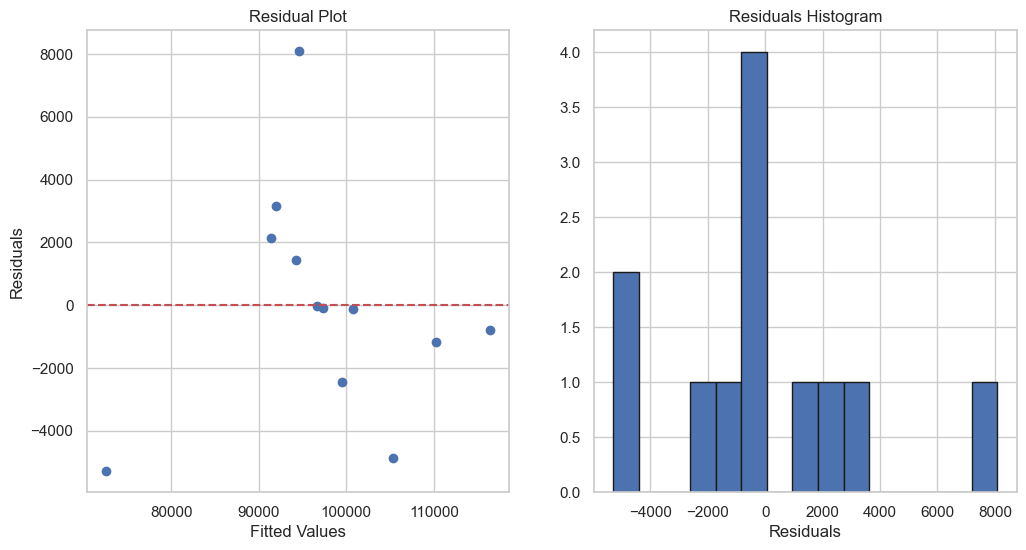

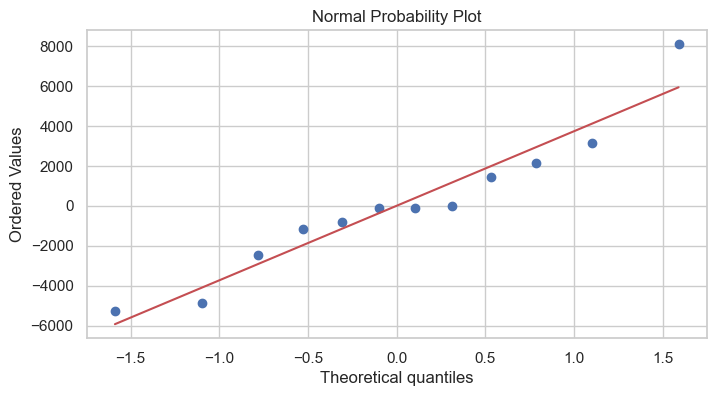

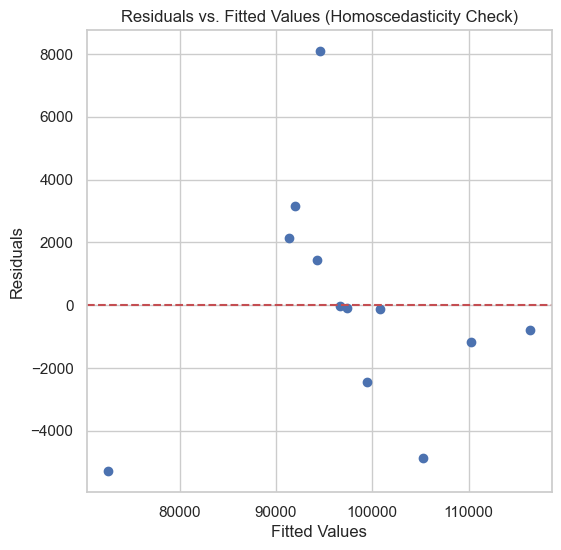

Durbin-Watson Statistic: 1.85
Potential Outliers at indices: [2]


In [64]:
import scipy.stats as stats
# Get the residuals
residuals = model.resid

# Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')

# Normality Check
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, edgecolor='k')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')

plt.show()

# Q-Q Plot for Normality
plt.figure(figsize=(8, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot')

plt.show()

# Check for Homoscedasticity
plt.figure(figsize=(6, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')

plt.show()

# Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_statistic:.2f}')

# Evaluate Outliers
outliers = np.abs(residuals) > 2 * np.std(residuals)  # You can adjust the threshold as needed
outlier_indices = np.where(outliers)[0]

if len(outlier_indices) > 0:
    print(f'Potential Outliers at indices: {outlier_indices}')
else:
    print('No significant outliers detected.')

# Additional checks and analysis as needed
